In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Classification
===============

Classfication of digit with hand written image (gray scale data matrix)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits() #n_class=10 all options
print(digits.keys())
print("\nuse data-X target-y to train and test")

dict_keys(['target', 'target_names', 'DESCR', 'images', 'data'])

use data-X target-y to train and test


In [3]:
#digits.DESCR

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# Total number of images as target array
print(np.unique(digits.target))
print(digits.target.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797,)


In [6]:
#digits.images is numpy array #1797 8*8 matrix image, digits.data is 1797*64 flatten data
print(digits.images.shape)
# each image with 64 digits
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


index and show examples

In [7]:
index = 50
print("result number is :" + str(digits.target[index]))

result number is :2


In [8]:
# each image has gray scale values in a 8*8 matrix
print("-----------------------number index " +str(index)+" image two dimensional data for plot-----------------------\n\n")
print(digits.images[index])

-----------------------number index 50 image two dimensional data for plot-----------------------


[[  0.   0.   0.   5.  14.  12.   2.   0.]
 [  0.   0.   7.  15.   8.  14.   4.   0.]
 [  0.   0.   6.   2.   3.  13.   1.   0.]
 [  0.   0.   0.   1.  13.   4.   0.   0.]
 [  0.   0.   1.  11.   9.   0.   0.   0.]
 [  0.   8.  16.  13.   0.   0.   0.   0.]
 [  0.   5.  14.  16.  11.   2.   0.   0.]
 [  0.   0.   0.   6.  12.  13.   3.   0.]]


In [9]:
# each image has gray scale values in a 8*8 matrix
print("-----------------------number index " +str(index)+" image one dimensional data for train and test \
-----------------------\n\n")
print(digits.data[index])

-----------------------number index 50 image one dimensional data for train and test -----------------------


[  0.   0.   0.   5.  14.  12.   2.   0.   0.   0.   7.  15.   8.  14.   4.
   0.   0.   0.   6.   2.   3.  13.   1.   0.   0.   0.   0.   1.  13.   4.
   0.   0.   0.   0.   1.  11.   9.   0.   0.   0.   0.   8.  16.  13.   0.
   0.   0.   0.   0.   5.  14.  16.  11.   2.   0.   0.   0.   0.   0.   6.
  12.  13.   3.   0.]


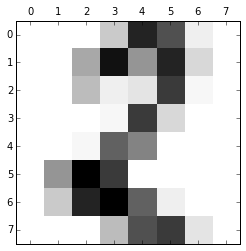

In [10]:
#draw matrix figure with plt.matshow

plt.matshow(digits.images[index], cmap=plt.cm.Greys)

In [11]:
# check if the image is correct and closing numbers to double check.
digits.target[0:index+1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2])

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [12]:
# split 75% train and 25% test
# digits.data ~ X_train, X_test, pixels for images
# digits.target ~ y_train, y_test, result with number 0~9
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Compare SVM and Random Forrest (Really Simple API)
-------------------
0) Import model class

In [13]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [14]:
svm = LinearSVC(C=0.1)

2) Fit the model

In [15]:
svm.fit(X_train, y_train)
# trained result is stored in SVM object

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [16]:
# >>>>> return a class label for each image data
y_train_predict = svm.predict(X_train)
print(y_train_predict)
print(y_train)

[8 7 5 ..., 1 4 1]
[8 7 5 ..., 1 4 1]


In [17]:
# fraction of correctly predicated samples for training; e.g. arg, data, truth label
svm.score(X_train, y_train)

0.99777282850779514

In [18]:
# >>>>> return a class label for each image data
y_test_predict = svm.predict(X_test)
print(y_test_predict[0:30])
print(y_test[0:30])

[9 0 2 5 3 5 2 1 8 6 8 6 1 1 1 2 5 6 7 1 0 8 1 0 0 2 6 8 0 0]
[9 0 2 5 3 5 2 1 8 6 8 6 1 1 1 2 5 6 7 1 0 7 1 0 0 2 1 8 0 0]


In [19]:
# evaluate model accuracy
svm.score(X_test, y_test)

0.94888888888888889

4) typical case analysis (find reason why different)

In [20]:
def find_notmatch_index(y1, y2):
    index = []
    n = len(y1)
    for i in np.arange(n):
        if y1[i] != y2[i]:
            index.append(i)
    return index

[327, 645, 897]

From total 3 mismatched result, index : 2

 training result should be 8

 training result predict as 1


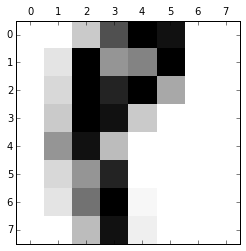

In [22]:
train_notmatch= find_notmatch_index(svm.predict(X_train), y_train)
print(train_notmatch)
index_train_notmatch = 2
print("\nFrom total " + str(len(train_notmatch)) + " mismatched result, index : " + str(index_train_notmatch))
plt.matshow(X_train[train_notmatch[index_train_notmatch]].reshape(8,8), cmap=plt.cm.Greys)
print("\n training result should be " + str(y_train[train_notmatch[index_train_notmatch]]))
print("\n training result predict as " + str(y_train_predict[train_notmatch[index_train_notmatch]]))

[21, 26, 32, 42, 101, 140, 167, 187, 199, 208, 210, 211, 229, 240, 267, 276, 333, 337, 344, 374, 395, 397, 445]

From total 23 mismatched result, index : 4

 test result should be 9

 test result predict as 5


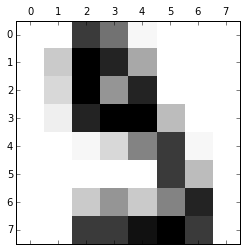

In [23]:
test_notmatch = find_notmatch_index(svm.predict(X_test), y_test)
print(test_notmatch)
index_test_notmatch = 4
print("\nFrom total " + str(len(test_notmatch)) + " mismatched result, index : " + str(index_test_notmatch))
plt.matshow(X_test[test_notmatch[index_test_notmatch]].reshape(8,8), cmap=plt.cm.Greys)
print("\n test result should be " + str(y_test[test_notmatch[index_test_notmatch]]))
print("\n test result predict as " + str(y_test_predict[test_notmatch[index_test_notmatch]]))

Random Forrest
---------

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# n_estimators number of trees in forest, random_state make result reproducible
rf = RandomForestClassifier(n_estimators=50, random_state = 1)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [27]:
y_test_predict_rf = rf.predict(X_test)

In [28]:
rf.score(X_test, y_test)
# random forest better

0.96666666666666667

[0, 36, 76, 101, 140, 163, 207, 208, 211, 237, 249, 289, 333, 337, 445]

From total 15 mismatched Random Forrest result, index : 3

 test result should be 9

 test result predict as 5

From total 23 mismatched SVM result
[21, 26, 32, 42, 101, 140, 167, 187, 199, 208, 210, 211, 229, 240, 267, 276, 333, 337, 344, 374, 395, 397, 445]


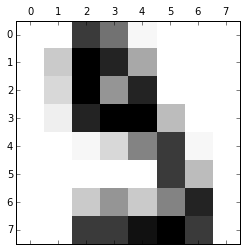

In [29]:
test_notmatch_rf = find_notmatch_index(y_test_predict_rf, y_test)
print(test_notmatch_rf)
index_test_notmatch_rf = 3
print("\nFrom total " + str(len(test_notmatch_rf)) + " mismatched Random Forrest result, index : " + str(index_test_notmatch_rf))
plt.matshow(X_test[test_notmatch_rf[index_test_notmatch_rf]].reshape(8,8), cmap=plt.cm.Greys)
print("\n test result should be " + str(y_test[test_notmatch_rf[index_test_notmatch_rf]]))
print("\n test result predict as " + str(y_test_predict[test_notmatch_rf[index_test_notmatch_rf]]))
print("\nFrom total " + str(len(test_notmatch)) + " mismatched SVM result")
print(test_notmatch)

#Two features (x,y), two classes (red, blue), train-full color,  test~opaque color

<h1>Classifier Comparison</h1>
<img src="classifier_comparison.png" width=100%>

Labels the output result to String (mapping number to array)
=============================

In [30]:
numbers = np.array(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"])

In [31]:
# as train is only numbers 0-9, it will transform to index for new string array and do the mapping
y_train_string = numbers[y_train]
svm.fit(X_train, y_train_string)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [32]:
svm.predict(X_test)

array(['nine', 'zero', 'two', 'five', 'three', 'five', 'two', 'one',
       'eight', 'six', 'eight', 'six', 'one', 'one', 'one', 'two', 'five',
       'six', 'seven', 'one', 'zero', 'eight', 'one', 'zero', 'zero',
       'two', 'six', 'eight', 'zero', 'zero', 'three', 'nine', 'eight',
       'two', 'three', 'six', 'eight', 'six', 'six', 'six', 'eight', 'one',
       'eight', 'seven', 'three', 'two', 'eight', 'two', 'seven', 'zero',
       'two', 'seven', 'seven', 'nine', 'six', 'four', 'three', 'one',
       'four', 'five', 'seven', 'two', 'seven', 'zero', 'four', 'zero',
       'two', 'four', 'six', 'one', 'four', 'four', 'three', 'eight',
       'four', 'five', 'nine', 'three', 'six', 'two', 'nine', 'zero',
       'four', 'six', 'zero', 'zero', 'eight', 'seven', 'six', 'six',
       'six', 'five', 'eight', 'one', 'four', 'four', 'four', 'three',
       'zero', 'two', 'five', 'five', 'four', 'one', 'seven', 'two',
       'four', 'six', 'two', 'four', 'four', 'five', 'zero', 'five', 't